# This is the paper's data analysis:

In [2]:
import pandas as pd
import importlib
from time import time

# the python scripts to know what we should feed as parameters:
import rrlfeh_nn_utils as ut
import rrlfeh_nn_models as mm
import rrlfeh_nn_io as io


importlib.reload(io)
importlib.reload(ut)
importlib.reload(mm)




<module 'rrlfeh_nn_models' from '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/rrlfeh_nn_models.py'>

In [ ]:
!python rrlfeh_nn.py --help

In [166]:
!python rrlfeh_nn.py @gfeh.par


2023-08-06 17:41:47.443313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Density weighing is ON with cutoff 0.5
Number of input channels: 2
Number of meta features: 0
Number of devices:  1
Default strategy set for CPU
Global batch size = 256
Batch size per replica = 256
2023-08-06 17:41:50.293506: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
                 id  Nep    period  totamp  meanmag  phcov    snr
0   288243845193088   15  0.554450   0.449   18.447  0.766   29.6
1   584630948352256   18  0.555454   0.717   17.433  0.867   73.5
2  4235220006525184   13  0.466383   1.120   14.781  0.813  219.7
3  43

# Inputs for the model : 
1. input_model_dir     results_g/best_model_g
2. lcdir    lc_target_g  (light curves)
3. input_file  gaiaDR2_rrab_g__all_gpr_param.dat (meta data) 
4. lcfile_suffices    _bin.dat

# 3. Metadata:


we need these columns from the metadat for these arguments :

**column inputs**:  id period snr totamp phcov Nep meanmag

**feature inputs** : id period totamp

**Meta_input** : period (uncomment if you are using a model with second input layer)



**There is a plot (gfeh_nn_input_table_hist.png) in result_g (outputdir) this plot shows distributions of the columns which have been inputted.**

In [3]:
with open('/home/melika/Desktop/Thesis/Model/Deep/gaiaDR2_rrab_g__all_gpr_param.dat', 'r') as dat_file:
    lines = dat_file.readlines()


csv_data = []
for line in lines:
    line = line.strip()  
    if line.startswith('#'):
        line = line[1:]  
    values = line.split()  
    csv_data.append(values)

with open('/home/melika/Desktop/Thesis/Model/Deep/gaiaDR2_rrab_g__all_gpr_param.csv', 'w') as csv_file:
    for values in csv_data:
        csv_line = ','.join(values) + '\n' 
        csv_file.write(csv_line)

FileNotFoundError: [Errno 2] No such file or directory: '/home/melika/Desktop/Thesis/Model/Deep/gaiaDR2_rrab_g__all_gpr_param.dat'

In [5]:
df = pd.read_csv('/home/melika/Desktop/Thesis/Model/Deep/gaiaDR2_rrab_g__all_gpr_param.csv')

In [6]:
df.head()

,id,Nep,period,totamp,A1,A2,A3,phi1,phi2,phi3,...,meanmag,cost,aper,phcov,phcov2,snr,ZPErr,Npt,order,minmax
0,288243845193088,15,0.554450,0.449,0.215,0.037,0.002,-0.039,2.642,2.282,...,18.447,0.0187,1,0.766,0.856,29.6,0.0,15,3,0.561
1,584630948352256,18,0.555454,0.717,0.295,0.123,0.043,0.012,2.509,5.534,...,17.433,0.0147,1,0.867,0.833,73.5,0.0,18,3,0.724
2,4235220006525184,13,0.466383,1.120,0.474,0.198,0.085,-0.003,2.186,4.441,...,14.781,0.0027,1,0.813,0.788,219.7,0.0,13,3,1.057
3,4320462222054528,16,0.517983,0.938,0.384,0.216,0.061,-0.017,1.665,3.718,...,18.960,0.0299,1,0.840,0.826,41.7,0.0,16,3,0.897
4,4413581407948800,14,0.487815,0.814,0.330,0.157,0.049,-0.081,1.830,4.460,...,18.070,0.0055,1,0.703,0.743,106.3,0.0,14,3,0.593


In [6]:
df.columns

Index(['id', 'Nep', 'period', 'totamp', 'A1', 'A2', 'A3', 'phi1', 'phi2',
       'phi3', 'phi21', 'phi31', 'meanmag', 'cost', 'aper', 'phcov', 'phcov2',
       'snr', 'ZPErr', 'Npt', 'order', 'minmax'],
      dtype='object')

In [7]:
df_input_columns = df[['id', 'period', 'snr', 'totamp', 'phcov', 'Nep', 'meanmag']]
df_input_columns

,id,period,snr,totamp,phcov,Nep,meanmag
0,288243845193088,0.554450,29.6,0.449,0.766,15,18.447
1,584630948352256,0.555454,73.5,0.717,0.867,18,17.433
2,4235220006525184,0.466383,219.7,1.120,0.813,13,14.781
3,4320462222054528,0.517983,41.7,0.938,0.840,16,18.960
4,4413581407948800,0.487815,106.3,0.814,0.703,14,18.070
...,...,...,...,...,...,...,...
98019,6916489473757428352,0.583559,187.8,0.605,0.878,37,17.320
98020,6916703229985361664,0.594571,197.1,0.625,0.928,40,14.816
98021,6916710205012286848,0.584955,214.2,0.790,0.888,39,18.048
98022,6916774011046503040,0.496691,433.4,1.112,0.898,37,15.549


In [8]:
feature_input = df[['id', 'period', 'totamp']]
feature_input

,id,period,totamp
0,288243845193088,0.554450,0.449
1,584630948352256,0.555454,0.717
2,4235220006525184,0.466383,1.120
3,4320462222054528,0.517983,0.938
4,4413581407948800,0.487815,0.814
...,...,...,...
98019,6916489473757428352,0.583559,0.605
98020,6916703229985361664,0.594571,0.625
98021,6916710205012286848,0.584955,0.790
98022,6916774011046503040,0.496691,1.112


# what are the differences between these two metadata :

**`o4rrab_gaiaDR2_bp_rp_i_g_param.dat` and `gaiaDR2_rrab_g__all_gpr_param.dat`:**

##### `o4rrab_gaiaDR2_bp_rp_i_g_param.dat` :
this is a metadata for `training` ! since it has the metallicity which are the targets for the training.


##### `gaiaDR2_rrab_g__all_gpr_param.dat`:
This is only for the `prediction` with the weights which were saved before.

In [9]:
with open('/home/melika/Desktop/Thesis/Model/Deep/o4rrab_gaiaDR2_bp_rp_i_g_param.dat', 'r') as dat_file:
    lines = dat_file.readlines()


csv_data = []
for line in lines:
    line = line.strip()  
    if line.startswith('#'):
        line = line[1:]  
    values = line.split()  
    csv_data.append(values)

with open('/home/melika/Desktop/Thesis/Model/Deep/o4rrab_gaiaDR2_bp_rp_i_g_param.csv', 'w') as csv_file:
    for values in csv_data:
        csv_line = ','.join(values) + '\n' 
        csv_file.write(csv_line)

In [10]:
df2 = pd.read_csv('/home/melika/Desktop/Thesis/Model/Deep/o4rrab_gaiaDR2_bp_rp_i_g_param.csv')
df2

,id,period,Nep_bp,totamp_bp,A1_bp,A2_bp,A3_bp,phi1_bp,phi2_bp,phi3_bp,...,snr_g,Npt_g,order_g,minmax_g,RA,DEC,L,B,Imean,VmI
0,5940412873908584192,0.461818,14,0.000,0.000,0.000,0.000,0.571,-0.418,-0.139,...,163.8,28,5,0.894,249.178283,-50.068066,-24.763663,-1.882258,19.118,NaN
1,5969341432850854528,0.545176,22,0.739,0.310,0.111,0.017,-0.092,2.717,2.486,...,35.5,25,3,0.515,249.181303,-40.063242,-17.339176,4.831402,17.794,NaN
2,5969331679020096384,0.585123,30,0.678,0.282,0.129,0.040,-0.117,1.941,-1.797,...,443.4,33,6,0.643,249.188325,-40.202351,-17.439323,4.734344,15.505,1.702
3,6019418075791964160,0.461979,22,3.599,0.388,0.932,0.670,0.212,2.571,-2.265,...,876.7,20,5,1.022,249.190195,-37.348006,-15.303000,6.639247,16.639,1.236
4,5930541561668628736,0.711276,24,0.499,0.191,0.083,0.056,-0.007,2.354,-1.132,...,524.7,31,7,0.395,249.196981,-54.203651,-27.829700,-4.663466,14.018,1.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13185,5931072655768568704,0.432205,19,1.250,0.415,0.270,0.190,0.009,2.117,-2.567,...,271.6,33,6,1.027,249.100310,-52.508789,-26.607283,-3.484832,16.748,1.307
13186,5968466019742787584,0.620458,25,1.513,0.683,0.192,0.070,-0.255,-0.027,-0.987,...,34.9,32,3,0.664,249.109249,-42.938684,-19.514171,2.943904,17.954,NaN
13187,5943005797221208832,0.349360,10,4.638,1.497,0.900,0.705,0.802,-0.287,-1.777,...,129.5,21,3,0.578,249.129466,-45.831759,-21.648307,0.989073,18.201,NaN
13188,5968883868518483968,0.452264,29,3.108,0.409,0.591,0.669,-0.300,2.294,-1.722,...,241.7,31,5,0.815,249.144671,-40.885714,-17.970787,4.301463,18.136,1.948


In [13]:
df2.columns

Index(['id', 'period', 'Nep_bp', 'totamp_bp', 'A1_bp', 'A2_bp', 'A3_bp',
       'phi1_bp', 'phi2_bp', 'phi3_bp', 'phi21_bp', 'phi31_bp', 'meanmag_bp',
       'cost_bp', 'phcov_bp', 'phcov2_bp', 'snr_bp', 'order_bp', 'minmax_bp',
       'Nep_rp', 'totamp_rp', 'A1_rp', 'A2_rp', 'A3_rp', 'phi1_rp', 'phi2_rp',
       'phi3_rp', 'phi21_rp', 'phi31_rp', 'meanmag_rp', 'cost_rp', 'phcov_rp',
       'phcov2_rp', 'snr_rp', 'order_rp', 'minmax_rp', 'OGLEID', 'Nep_i',
       'totamp_i', 'A1_i', 'A2_i', 'A3_i', 'A1_e_i', 'A2_e_i', 'A3_e_i',
       'phi1_i', 'phi2_i', 'phi3_i', 'phi1_e_i', 'phi2_e_i', 'phi3_e_i',
       'phi21_i', 'phi21_e_i', 'phi31_i', 'phi31_e_i', 'meanmag_i',
       'meanmag_e_i', 'cost_i', 'costN_i', 'phcov_i', 'phcov2_i', 'snr_i',
       'Npt_i', 'order_i', 'minmax_i', 'FeH', 'FeH_e', 'Nep_g', 'totamp_g',
       'A1_g', 'A2_g', 'A3_g', 'phi1_g', 'phi2_g', 'phi3_g', 'phi21_g',
       'phi31_g', 'meanmag_g', 'cost_g', 'phcov_g', 'phcov2_g', 'snr_g',
       'Npt_g', 'order_g', 'm

In [8]:
!pwd

/home/melika/Desktop/Thesis/Model/Deep


In [2]:
import configparser
import sys
import importlib
import os
import glob
import numpy as np
import joblib
import configparser




idcolumn = "id" 
nmags = 80 
nuse = 3 

Parsing the parameter's file :


In [4]:
class Parameter:
    def __init__(self, rootdir, lcdir, lcfile_suffices, columns,
                 subset, input_file, features, outdir, nn_type,
                 nbins, meta_input, wavebands, max_phase,
                 plot_input_data, predict, model, n_channels, n_meta, hpars):
        self.rootdir = rootdir
        self.lcdir = lcdir
        self.lcfile_suffices = lcfile_suffices
        self.columns = columns
        self.subset = subset
        self.input_file = input_file
        self.features = features
        self.outdir = outdir
        self.nn_type = nn_type
        self.nbins = nbins
        self.meta_input = meta_input
        self.wavebands = wavebands
        self.max_phase = max_phase
        self.plot_input_data = plot_input_data
        self.predict = predict  # if you are training this should be False and make another attribute training.
        self.model = model
        self.n_channels = n_channels
        self.n_meta = n_meta
        self.hpars = hpars


def __str__(self):
    return (
        f"Root Dir: {self.rootdir}\nLC Dir: {self.lcdir}\nLC Suffixes: {self.lcfile_suffices}\n"
        f"Columns: {self.columns}\nSubset: {self.subset}\nMeta Input: {self.input_file}\n"
        f"features: {self.features}\noutdir: {self.outdir}\nnn_type: {self.nn_type}\n"
        f"nbins: {self.nbins}\nmeta_input: {self.meta_input}\nwavebands : {self.wavebands}\n"
        f"max_phase : {self.max_phase}\nplot_input_data : {self.plot_input_data}\n"
        f"predict : {self.predict}\nmodel : {self.model}\nn_channels : {self.n_channels}\n"
        f"n_meta : {self.n_meta}\nhpars : {self.hpars}"
    )


In [5]:
with open('gfeh.par', 'r') as f:
    lines = f.readlines()

rootdir = None
lcdir = None
lcfile_suffices = None
columns = None
subset = None
input_file = None
features = None
outdir = None
nn_type = None
nbins = None # wasn't mentioned in gfeh.par
meta_input = None # commented out ! (uncomment this only if using a model with second input layer for metadata)
wavebands = None
max_phase = None
plot_input_data = None # this was left empty
model = None
n_channels = None
n_meta = None
hpars = None
predict = True # just for prediction



for line in lines:
    if line.startswith('--rootdir'):
        rootdir = line.split()[1]
    elif line.startswith('--lcdir'): # this has to output a list, since there is a condition that reads 0th index of a list.
        lcdir = line.split()[1:]
    elif line.startswith('--lcfile_suffices'):
        lcfile_suffices = line.split()[1:]
    elif line.startswith('--columns'):
        columns = line.split()[1:]
    elif line.startswith('--subset'):
        sub = line.split()[1:]
        subset = ''
        for words in sub:
            subset = subset + ' ' + words

        
    elif line.startswith('--input_file'):
        input_file = line.split()[1:][0]
    elif line.startswith('--features'):
        features = line.split()[1:]
    elif line.startswith('--outdir'):
        outdir = line.split()[1:][0]
    elif line.startswith('--nn_type'):
        nn_type = line.split()[1:][0]
    elif line.startswith('--wavebands'):
        wavebands = line.split()[1:][0]
    elif line.startswith('--max_phase '):
        max_phase = float(line.split()[1:][0])
    elif line.startswith('--model '):
        model = line.split()[1:][0]
    elif line.startswith('--n_channels'):
        n_channels = line.split()[1:]
    elif line.startswith('--n_meta'):
        n_meta = line.split()[1:]
    elif line.startswith('--hpars'): 
        hpa = line.split()[1:10]
                
        hpars = tuple(hpa)

            
    

pars = Parameter(rootdir, lcdir, lcfile_suffices, columns, subset, input_file, features, outdir, nn_type, nbins, meta_input, wavebands, max_phase, plot_input_data, predict, model, n_channels, n_meta, hpars)


In [6]:
pars.outdir

'lcfit_crestani/results'

                 id  Nep    period  totamp  meanmag  phcov    snr
0   288243845193088   15  0.554450   0.449   18.447  0.766   29.6
1   584630948352256   18  0.555454   0.717   17.433  0.867   73.5
2  4235220006525184   13  0.466383   1.120   14.781  0.813  219.7
3  4320462222054528   16  0.517983   0.938   18.960  0.840   41.7
4  4413581407948800   14  0.487815   0.814   18.070  0.703  106.3
----------
98024 lines read from ./gaiaDR2_rrab_g__all_gpr_param.dat

58652 lines after threshold rejections



/home/melika/Desktop/Thesis/Model/Deep/rrlfeh_nn_utils.py:192: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.DataFrame.hist(df, bins=int(np.ceil(np.cbrt(ndata) * 2)), figsize=(20, 10), grid=False, color='red',


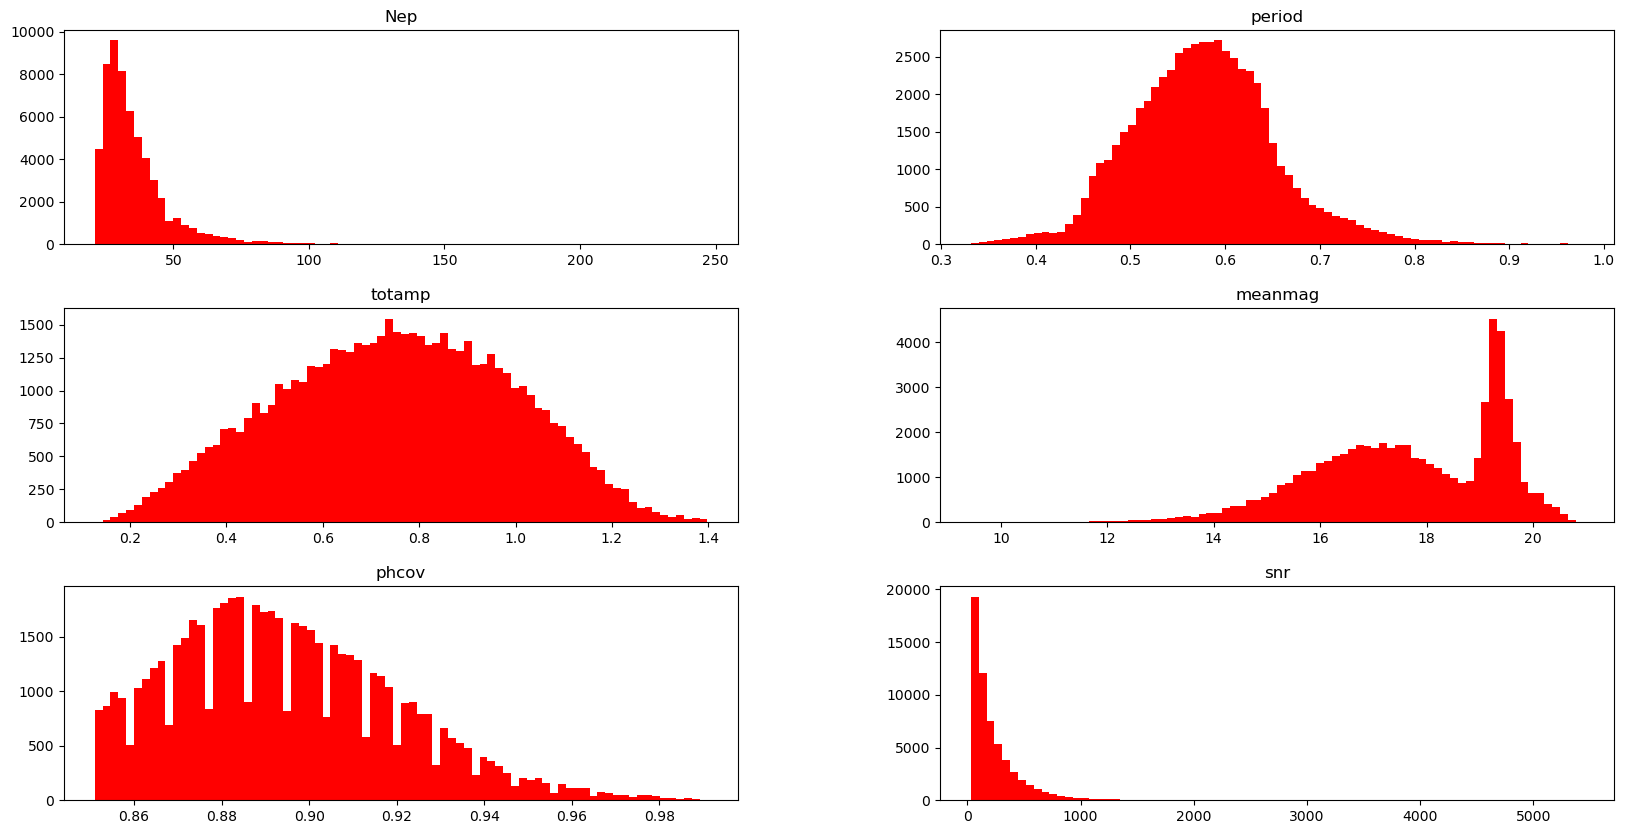

In [16]:
# reading the gaiaDR2_rrab_g__all_gpr_param.dat file with the read_dataset inside ut.
# Prediction


input_table, _ = ut.read_dataset(os.path.join(pars.rootdir, pars.input_file), columns=pars.columns,
                                 subset_expr=pars.subset, input_feature_names=pars.features, plothist=True,
                                 histfig=os.path.join(pars.rootdir, pars.outdir, "gfeh_nn_input_table_hist.png"),
                                 dropna_cols=None, comment='#', dtype={idcolumn: str})

In [17]:
input_table # with the subset parameter we put a limit to the period and other things, that's why some of the stars
#are missing.

,id,period,totamp
15,11977018818239872,0.515610,0.903
16,11991514330833408,0.564529,0.824
47,36039689056047872,0.600486,0.570
48,36110989810386560,0.607803,0.775
49,36246122364621440,0.542566,0.893
...,...,...,...
98019,6916489473757428352,0.583559,0.605
98020,6916703229985361664,0.594571,0.625
98021,6916710205012286848,0.584955,0.790
98022,6916774011046503040,0.496691,1.112


In [18]:
_

,id,Nep,period,totamp,meanmag,phcov,snr
0,288243845193088,15,0.554450,0.449,18.447,0.766,29.6
1,584630948352256,18,0.555454,0.717,17.433,0.867,73.5
2,4235220006525184,13,0.466383,1.120,14.781,0.813,219.7
3,4320462222054528,16,0.517983,0.938,18.960,0.840,41.7
4,4413581407948800,14,0.487815,0.814,18.070,0.703,106.3
...,...,...,...,...,...,...,...
98019,6916489473757428352,37,0.583559,0.605,17.320,0.878,187.8
98020,6916703229985361664,40,0.594571,0.625,14.816,0.928,197.1
98021,6916710205012286848,39,0.584955,0.790,18.048,0.888,214.2
98022,6916774011046503040,37,0.496691,1.112,15.549,0.898,433.4


In [19]:
n_data = len(input_table)
if pars.nn_type == "cnn":
    nmags = int(nmags / nuse)
else:
    if pars.nbins is not None:
        nmags = pars.nbins

print("Number of input phase points: {}".format(nmags))

ids = input_table[idcolumn].to_numpy().astype(str)
np.savetxt(os.path.join(pars.rootdir, pars.outdir, 'used_ids.lst'), ids.T, fmt="%s")

# Create data matrix for input layer 2 from time-series metadata:
if pars.meta_input is not None:
    X_meta_list = [input_table[feature].to_numpy() for feature in pars.meta_input]
    X_input2 = np.vstack(X_meta_list).T
    print("Shape of the input metadata matrix: {}".format(X_input2.shape))
else:
    X_input2 = None

# ------------------------------------------
# READ (AND PLOT) THE INPUT TIME SERIES:

if pars.nn_type == "cnn":
    # Read time series for a convolutional neural network
    X_input1, X_ts, X_ts_scaled, phases, groups = \
        ut.read_time_series_for_cnn(ids, pars.lcdir, nmags, pars.wavebands, pars.lcfile_suffices,
                                    rootdir=pars.rootdir, nuse=nuse, n_aug=pars.n_aug)
    # Plot input data:
    if pars.plot_input_data:
        for ii, waveband in enumerate(pars.wavebands):
            print("Plotting input data...")

            ut.plot_all_lc(phases, X_ts[waveband], nmags=nmags, shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, pars.outdir, waveband + "_lc_all"),
                           figformat=figformat)
            ut.plot_all_lc(phases, X_ts_scaled[waveband], nmags=nmags, shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, pars.outdir, waveband + "_lc_all_scaled"),
                           figformat=figformat)
            if X_input2 is not None:
                ut.plot_period_amplitude(X_input2, col=1 + ii, waveband=waveband, figformat=figformat,
                                         fname=os.path.join(pars.rootdir, pars.outdir, "logpP-A_" + waveband))

else:
    # Read time series for a recurrent neural network
    pars.n_aug = None  # augmented version not yet implemented
    groups = None
    if pars.meta_input:
        periods_input = None
    else:
        periods_input = input_table['period'].to_numpy()
    X_input1, times, mags, phases = \
        ut.read_time_series_for_rnn(ids, pars.lcdir, nmags, pars.wavebands,
                                    pars.lcfile_suffices, rootdir=pars.rootdir,
                                    periods=periods_input, max_phase=pars.max_phase, phase_shift=None, nbins=pars.nbins)

    # Plot input data:
    if pars.plot_input_data:
        print("Plotting input data...")
        for ii, waveband in enumerate(pars.wavebands):
            ut.plot_all_lc(phases[waveband], mags[waveband], shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, waveband + "_lc_all_rnn"),
                           figformat=figformat, nn_type="rnn")


Number of input phase points: 80


Reading time series...


In [20]:
path_target = '/home/melika/Desktop/Thesis/Model/Deep/target_g.out'


with open(path_target, 'r') as out_file:
    lines = out_file.readlines()


csv_data = []
for line in lines:
    line = line.strip()  
    if line.startswith('#'):
        line = line[1:]  
    values = line.split()  
    csv_data.append(values)

with open('/home/melika/Desktop/Thesis/Model/Deep/target_g.csv', 'w') as csv_file:
    for values in csv_data:
        csv_line = ','.join(values) + '\n' 
        csv_file.write(csv_line)

In [28]:
columns = ['id', 'true_test', 'pred_test']


df_out = pd.read_csv('/home/melika/Desktop/Thesis/Model/Deep/target_g.csv', names = columns)

df_out


,id,true_test,pred_test
0,11977018818239872,-1.731633,0.043197
1,11991514330833408,-2.009769,0.030340
2,36039689056047872,-1.449203,0.021204
3,36110989810386560,-2.098753,0.168614
4,36246122364621440,-1.710816,0.025859
...,...,...,...
58647,6916489473757428352,-1.512154,0.032799
58648,6916703229985361664,-1.654929,0.043179
58649,6916710205012286848,-1.641613,0.033083
58650,6916774011046503040,-1.691769,0.057302
